## <div align="center"> UJIAN TENGAH SEMESTER IF540-L MACHINE LEARNING </div>
## <div align="center"> Semester Gasal 2024/2025 </div>
## <div align="center"> Implementasi Gaussian Naive Bayes untuk Mendeteksi Diabetes </div>

---
### Kelompok - 6

#### Anggota Kelompok : 
1. Jonathan Susanto - 00000071412
2. Alvianda Chairofta - 00000082435
3. Muhammad Thaariq - 
4. Mitawati - 
...

---

### Dataset yang digunakan untuk projek:

1. Diabetes Dataset – sumber : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

### Hasil kerja

## Import Library

In [21]:
import sys

In [22]:
# Your codes are here (replace the following codes)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [38]:
df = pd.read_csv("./diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
#Checking the rows of the dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
#drop rows with missing value
df.dropna(axis = 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
#Mengecek apakah ada duplicate di data
duplicates = df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [27]:
# Menghapus baris duplikat
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Plot Dataset Sebelum normalisasi

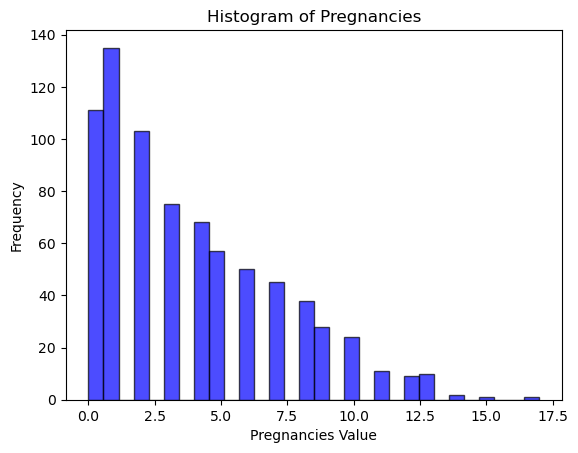

In [28]:
#Histogram Plot for Pregnancies
plt.hist(df.Pregnancies, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Pregnancies")
plt.xlabel('Pregnancies Value')
plt.ylabel('Frequency')

plt.show()

#sudah bagus

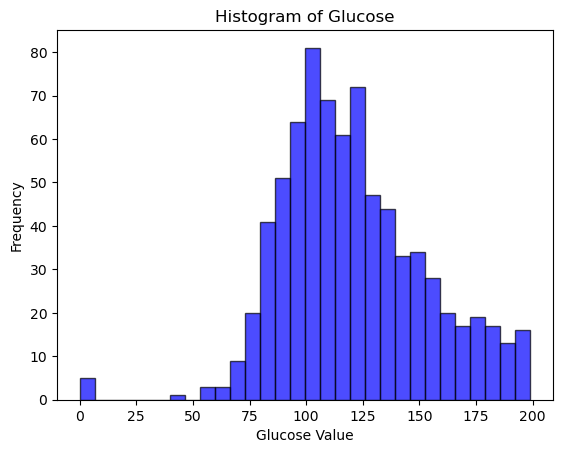

In [29]:
#Histogram Plot for Glucose
plt.hist(df.Glucose, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Glucose")
plt.xlabel('Glucose Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

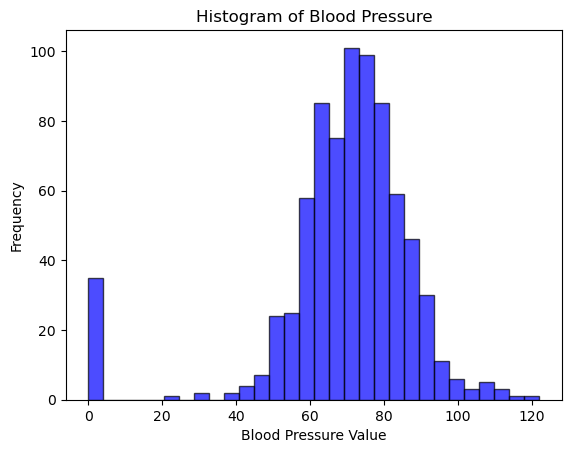

In [14]:
#Histogram Plot for BloodPressure
plt.hist(df.BloodPressure, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Blood Pressure")
plt.xlabel('Blood Pressure Value')
plt.ylabel('Frequency')

plt.show()

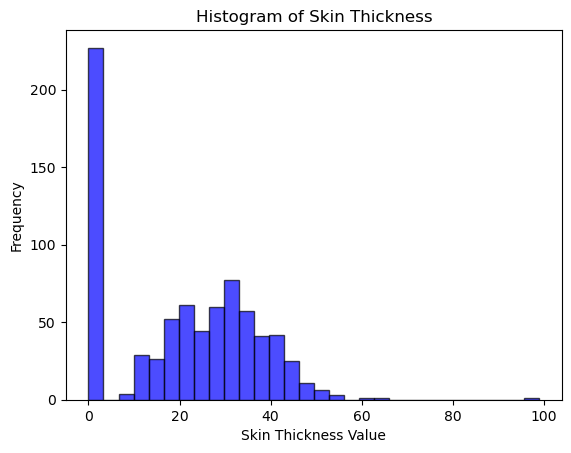

In [15]:
#Histogram Plot for SkinThickness
plt.hist(df.SkinThickness, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Skin Thickness")
plt.xlabel('Skin Thickness Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

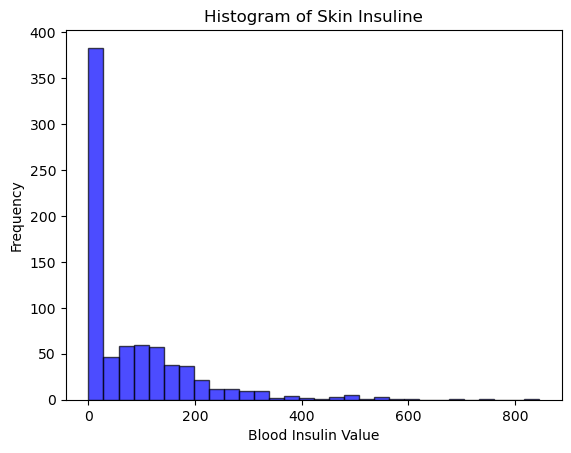

In [16]:
#Histogram Plot for SkinThickness
plt.hist(df.Insulin, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Skin Insuline")
plt.xlabel('Blood Insulin Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

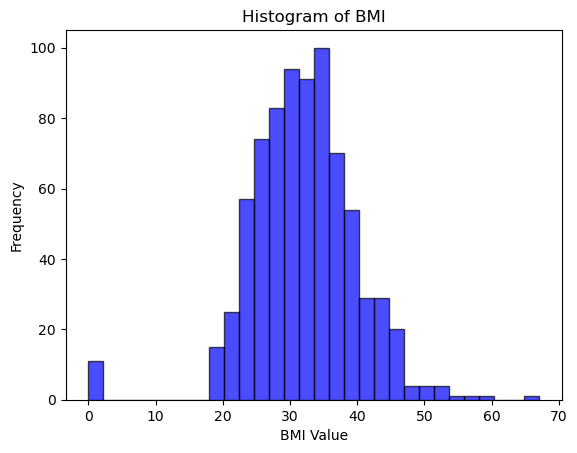

In [17]:
#Histogram Plot for BMI
plt.hist(df.BMI, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of BMI")
plt.xlabel('BMI Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

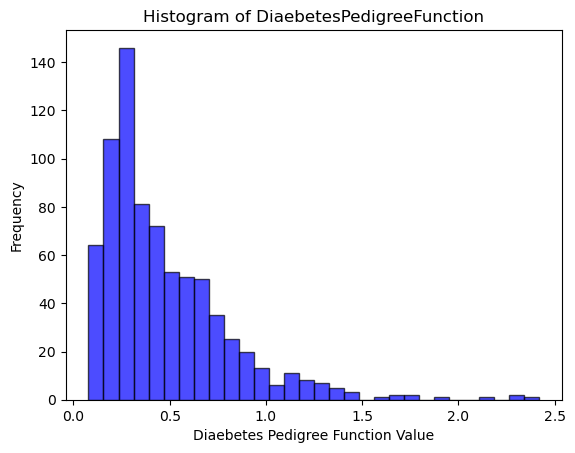

In [18]:
#Histogram Plot for DiaebetesPedigreeFunction
plt.hist(df.DiabetesPedigreeFunction, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of DiaebetesPedigreeFunction")
plt.xlabel('Diaebetes Pedigree Function Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

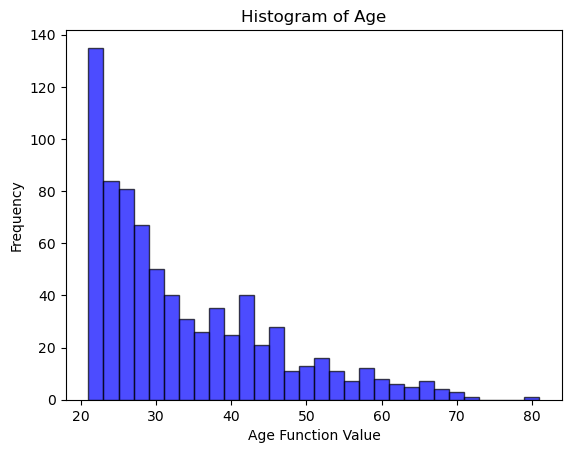

In [19]:
#Histogram Plot for Age
plt.hist(df.Age, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Age")
plt.xlabel('Age Function Value')
plt.ylabel('Frequency')

plt.show()

#harus di log normalization

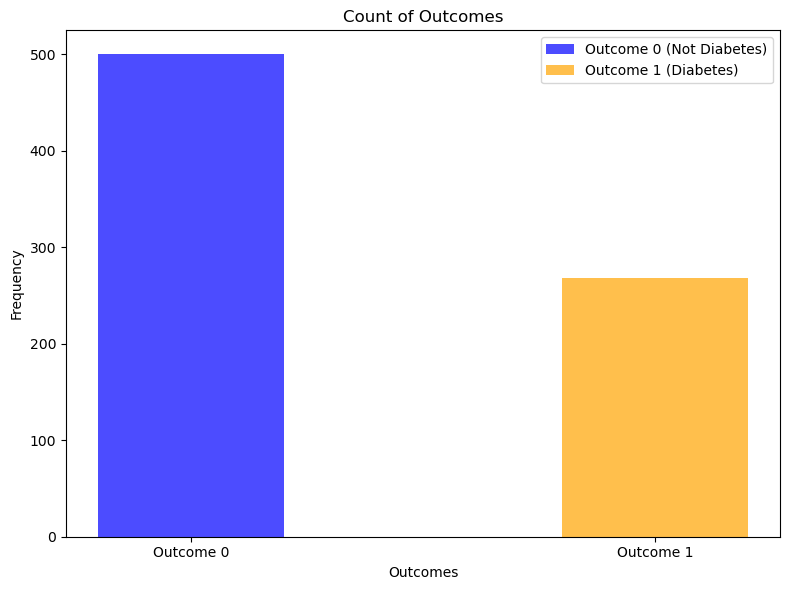

In [41]:
#Plot for Age

import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each outcome
counts = df['Outcome'].value_counts()

# Create a bar plot for both outcomes
plt.figure(figsize=(8, 6))

# Bar positions
bar_positions = [0, 1]  
bar_labels = ['Outcome 0', 'Outcome 1']

# Create bars
plt.bar(bar_positions[0], counts.get(0, 0), color='blue', alpha=0.7, width=0.4, label='Outcome 0 (Not Diabetes)')
plt.bar(bar_positions[1], counts.get(1, 0), color='orange', alpha=0.7, width=0.4, label='Outcome 1 (Diabetes)')

plt.title("Count of Outcomes")
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.xticks(bar_positions, bar_labels) 
plt.legend()

plt.tight_layout()
plt.show()


## Normalisasi Data

In [2]:
#Membuat variabel baru untuk df normalized
df_normalized = df.copy() 
df_normalized.head()

NameError: name 'df' is not defined

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#normalisasi menggunakan Log Transformation
#df_normalized.SkinThickness = np.log1p(df_normalized.SkinThickness)
#df_normalized.head()

#df_normalized.SkinThickness = np.sqrt(df_normalized.SkinThickness) 
#df_normalized.head()

#df_normalized.SkinThickness, _ = stats.boxcox(df_normalized.SkinThickness)
#df_normalized.head()

#scaler = StandardScaler()
#df_normalized[['BloodPressure']] = scaler.fit_transform(df_normalized[['BloodPressure']])
#df_normalized.head()

#scaler = RobustScaler()
#df_normalized['SkinThickness'] = scaler.fit_transform(df_normalized[['SkinThickness']])

In [3]:
#Histogram Plot for Pregnancies setelah normalisasi
plt.hist(df_normalized.SkinThickness, bins = 30, alpha = 0.7, color='blue', edgecolor='black')

plt.title("Histogram of Pregnancies after using Log Transformation")
plt.xlabel('Pregnancies Value')
plt.ylabel('Frequency')

plt.show()

NameError: name 'plt' is not defined

In [ ]:
!jupyter nbconvert --to html "./UTS2024_IF540L_KelasAL_Kelompok_1.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#